In [3]:
import numpy as np
from empiricaldist import Pmf
from scipy.stats import binom

In [2]:
hypos = np.linspace(0, 1, 101)
pmf = Pmf(1, hypos)
data = 140, 250

In [4]:
def update_binomial(pmf, data):
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [5]:
update_binomial(pmf, data)

In [6]:
cumulative = pmf.cumsum()

In [8]:
from utils import decorate

In [9]:
def decorate_euro(title):
    decorate(xlabel='Proportion of head (x)',
             ylabel='Probability',
             title=title)

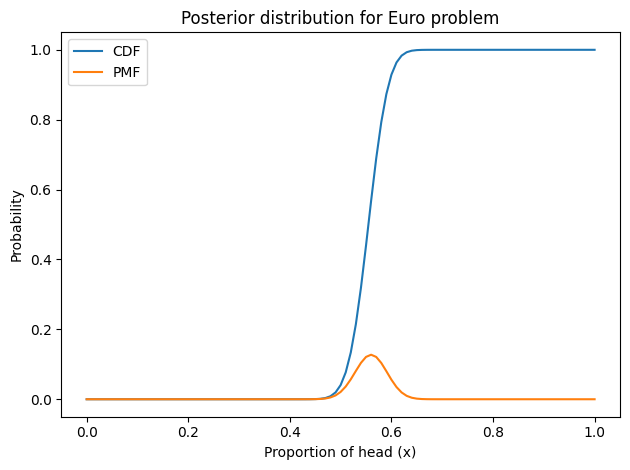

In [10]:
cumulative.plot(label='CDF')
pmf.plot(label='PMF')
decorate_euro(title='Posterior distribution for Euro problem')

In [11]:
cumulative[0.61]

np.float64(0.9638303193984253)

In [12]:
from scipy.interpolate import interp1d

In [15]:
ps = cumulative.values
qs = cumulative.index

interp = interp1d(ps, qs)
interp(0.96)

array(0.60890171)

In [16]:
# can also make cdf using pmf class :)
cdf = pmf.make_cdf()

In [17]:
cdf[0.61]

np.float64(0.9638303193984253)

In [19]:
try:
    cdf[0.615]
except Exception as e:
    print('error', e)
    cdf(0.615)

error 0.615


In [20]:
# can also go in the reverse direction, from probability to proportion
cdf.quantile(0.9638303)

array(0.61)

In [21]:
cdf.credible_interval(0.9)

array([0.51, 0.61])

One reason Cdf objects are useful is that they compute quantiles efficiently. Another is that they make it easy to compute the distribution of a maximum or minimum, as we’ll see in the next section.

7.2. Best Three of Four

In [22]:
from utils import make_die

In [23]:
die = make_die(6)
dice = [die] * 3

In [28]:
from utils import add_dist_seq
pmf_3d6 = add_dist_seq(dice)

In [30]:
def decorate_dice(title):
    decorate(xlabel='Outcome',
             ylabel='PMF',
             title=title)

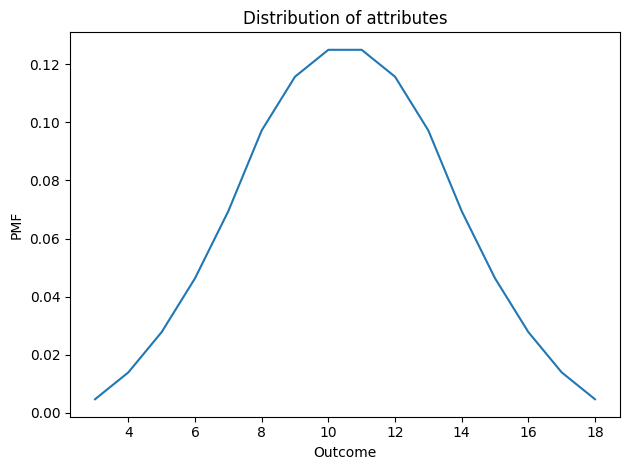

In [31]:
pmf_3d6.plot()
decorate_dice(title='Distribution of attributes')

If we roll four dice and add up the best three, computing the distribution of the sum is a bit more complicated. I’ll estimate the distribution by simulating 10,000 rolls.

In [32]:
n = 10_000
a = np.random.randint(1,7, size=(n, 4))

In [36]:
a.sort(axis=1)
t = a[:,1:].sum(axis=1)

In [38]:
pmf_best3 = Pmf.from_seq(t)

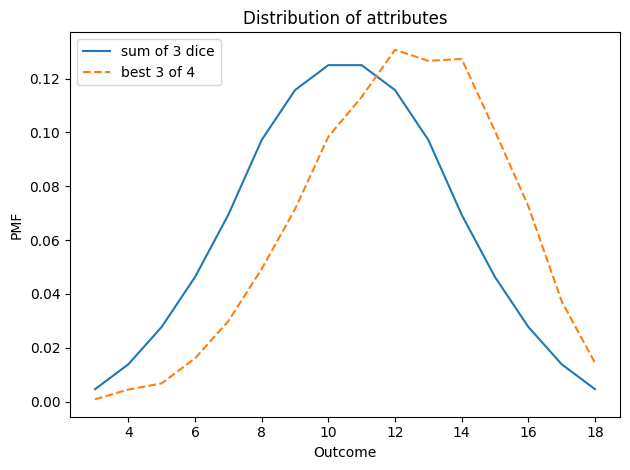

In [39]:
pmf_3d6.plot(label='sum of 3 dice')
pmf_best3.plot(label='best 3 of 4', ls='--')
decorate_dice('Distribution of attributes')

7.3. Maximum